In [22]:
df <- read.csv("data.csv");head(df)

,screen_size,X4g,X5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1,14.50,1,0,13,5,64,3,3020,146,2020,127,4.307572,4.715100
2,17.30,1,1,13,16,128,8,4300,213,2020,325,5.162097,5.519018
3,16.69,1,1,13,8,128,8,4200,213,2020,162,5.111084,5.884631
4,25.50,1,1,13,8,64,6,7250,480,2020,345,5.135387,5.630961
5,15.32,1,0,13,8,64,3,5000,185,2020,293,4.389995,4.947837
6,16.23,1,0,13,8,64,4,4000,176,2020,223,4.413889,5.060694


In [23]:
str(df)

'data.frame':	3454 obs. of  13 variables:
 $ screen_size          : num  14.5 17.3 16.7 25.5 15.3 ...
 $ X4g                  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ X5g                  : int  0 1 1 1 0 0 0 0 0 0 ...
 $ rear_camera_mp       : num  13 13 13 13 13 13 8 13 13 13 ...
 $ front_camera_mp      : num  5 16 8 8 8 8 5 8 16 8 ...
 $ internal_memory      : num  64 128 128 64 64 64 32 64 128 128 ...
 $ ram                  : num  3 8 8 6 3 4 2 4 6 6 ...
 $ battery              : num  3020 4300 4200 7250 5000 4000 3020 3400 4000 4000 ...
 $ weight               : num  146 213 213 480 185 176 144 164 165 176 ...
 $ release_year         : int  2020 2020 2020 2020 2020 2020 2020 2020 2020 2020 ...
 $ days_used            : int  127 325 162 345 293 223 234 219 161 327 ...
 $ normalized_used_price: num  4.31 5.16 5.11 5.14 4.39 ...
 $ normalized_new_price : num  4.72 5.52 5.88 5.63 4.95 ...


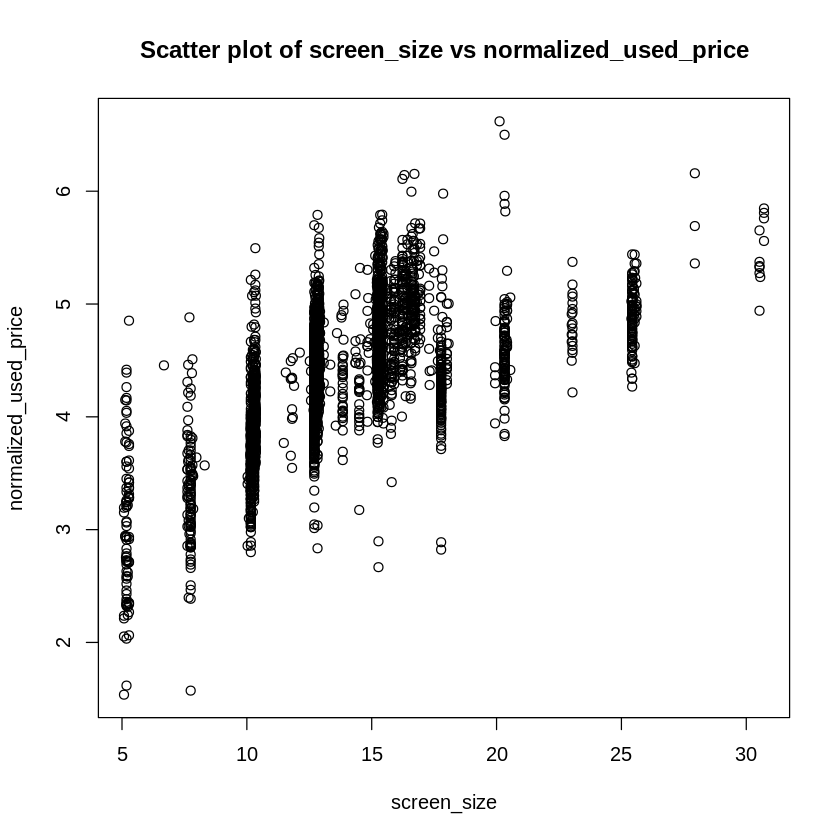

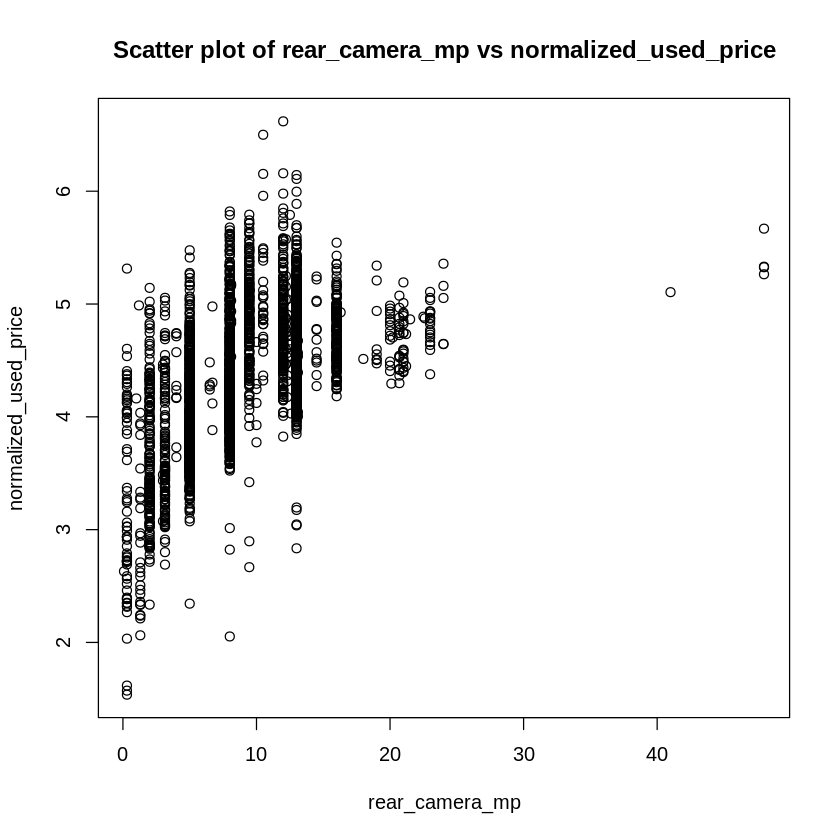

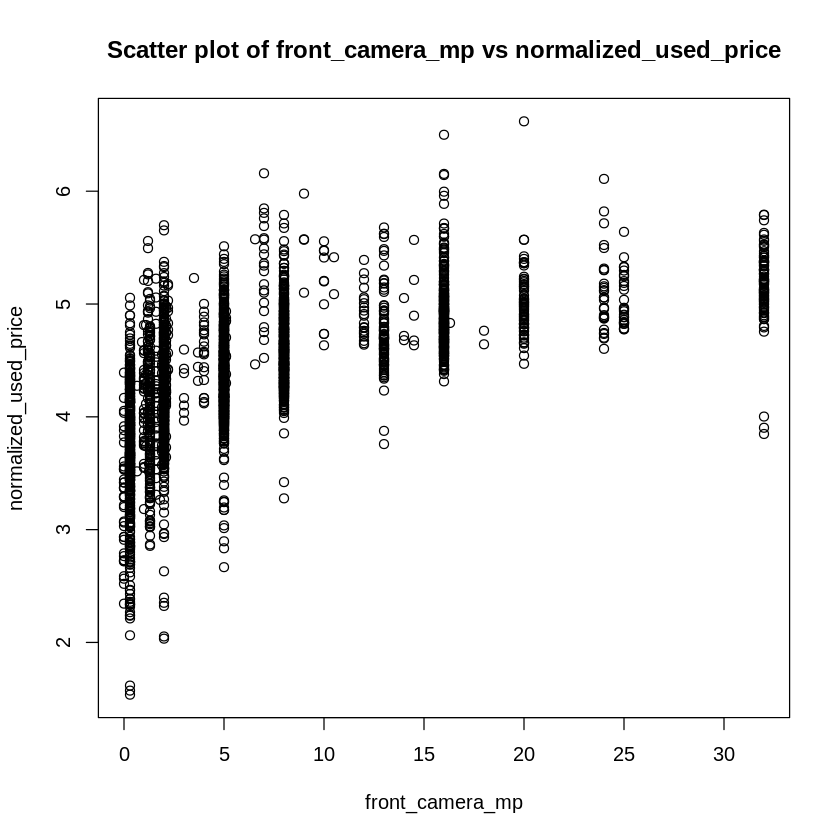

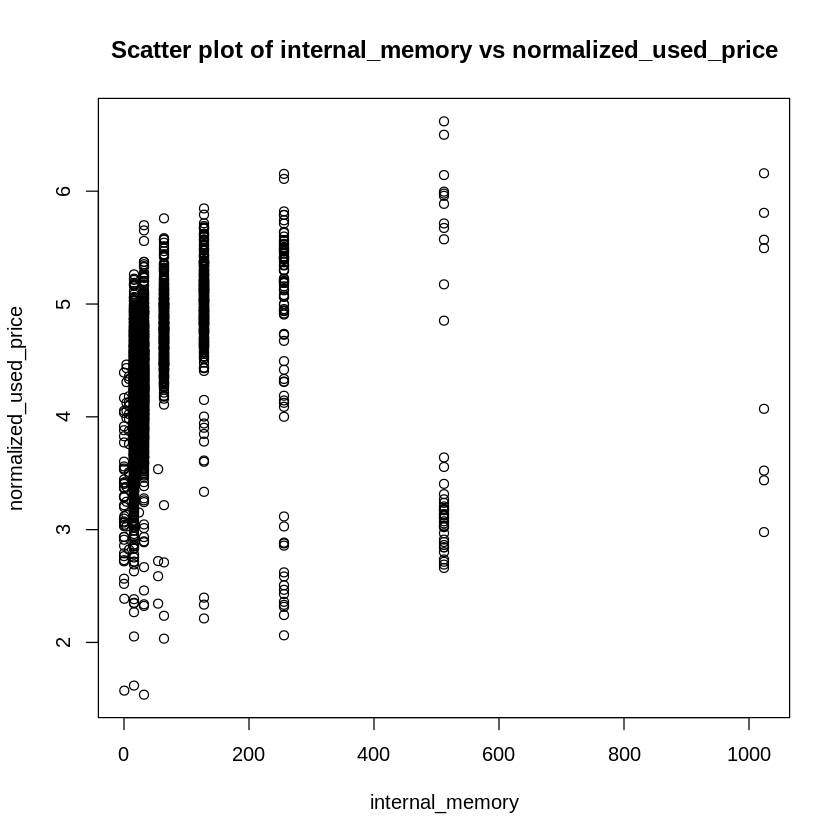

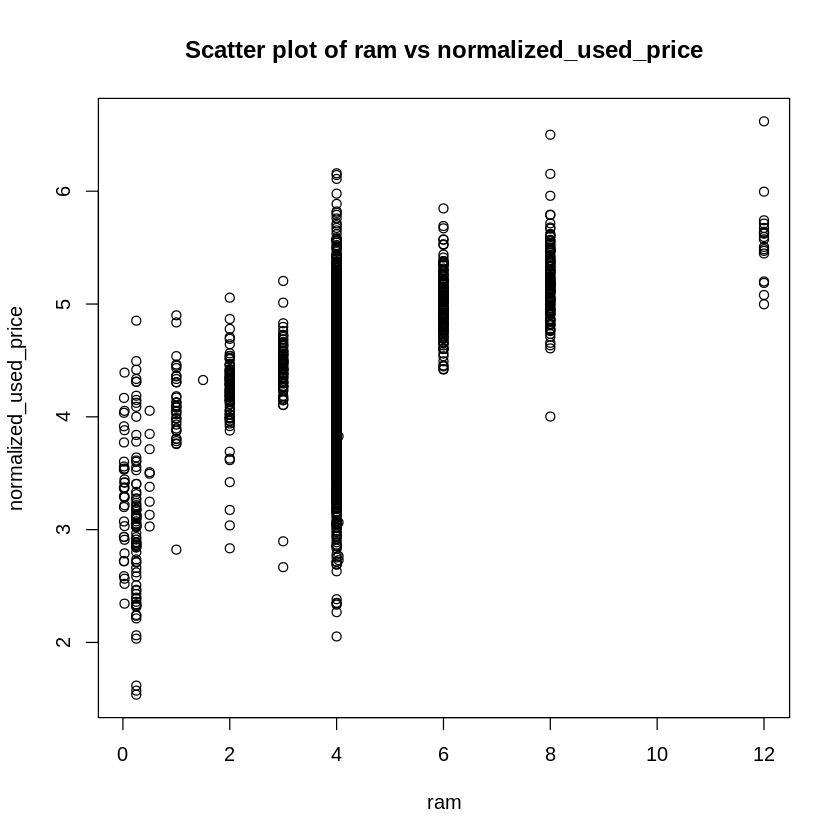

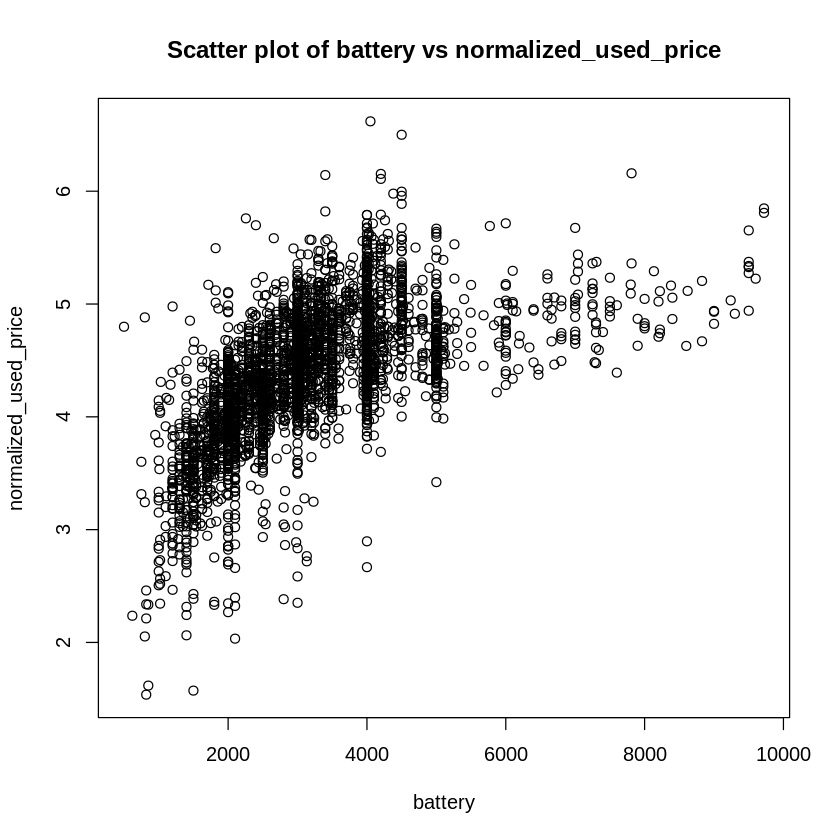

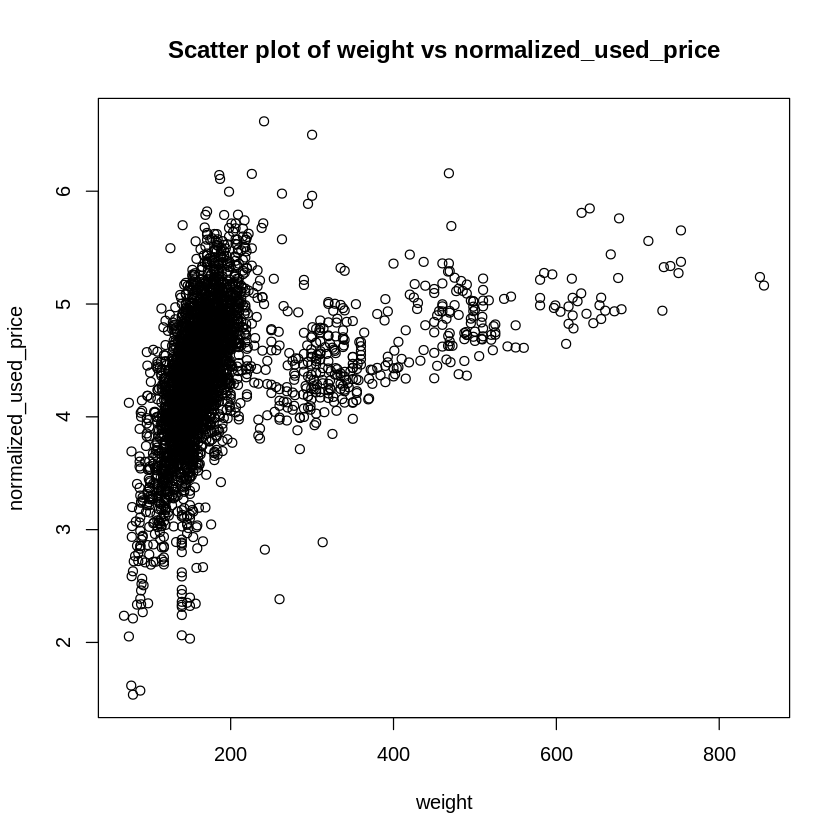

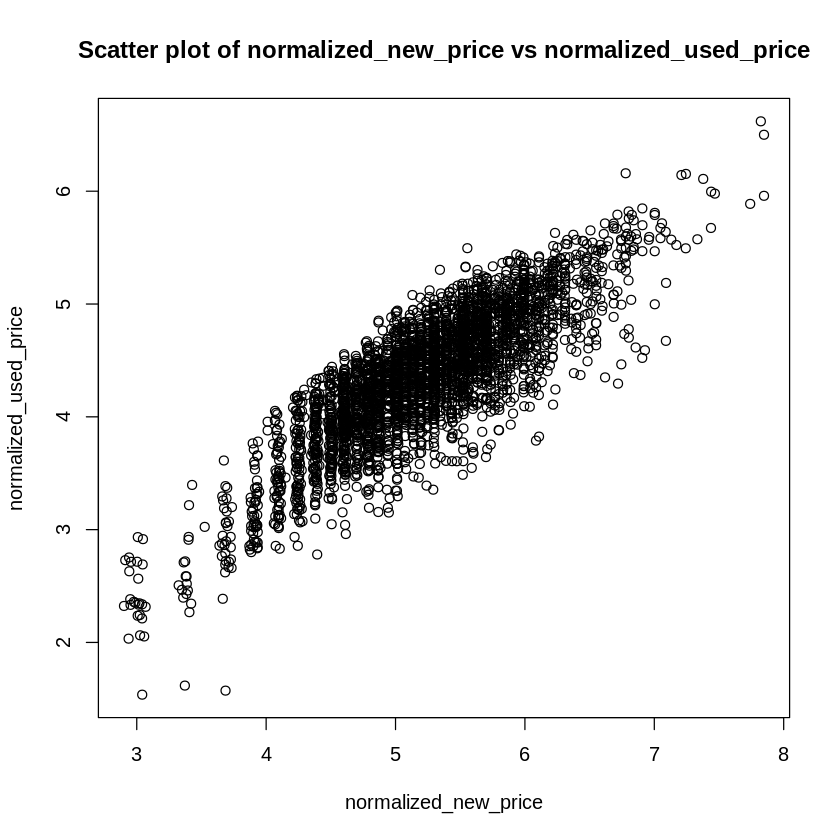

In [24]:
for (i in colnames(df)){
  if (class(df[[i]]) == 'numeric' & i != 'normalized_used_price'){
    plot(df[[i]], df$normalized_used_price, main=paste("Scatter plot of", i, "vs normalized_used_price"),
         xlab=i, ylab="normalized_used_price")
  }
}

No R, eu não preciso separar a matriz de desenho do vetor de repostas, a propria função faz esse processo.

In [30]:
modelo <- lm(normalized_used_price ~ ., data = df);summary(modelo)


Call:
lm(formula = normalized_used_price ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45530 -0.13869  0.02786  0.17197  1.25542 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -5.495e+01  7.493e+00  -7.334 2.77e-13 ***
screen_size           2.835e-02  2.533e-03  11.193  < 2e-16 ***
X4g                   4.329e-02  1.290e-02   3.356 0.000798 ***
X5g                  -3.870e-02  2.571e-02  -1.505 0.132299    
rear_camera_mp        2.147e-02  1.181e-03  18.174  < 2e-16 ***
front_camera_mp       1.376e-02  9.176e-04  14.998  < 2e-16 ***
internal_memory       2.910e-05  5.129e-05   0.567 0.570548    
ram                   2.485e-02  4.148e-03   5.990 2.32e-09 ***
battery              -1.259e-05  6.093e-06  -2.067 0.038815 *  
weight                8.131e-04  1.023e-04   7.947 2.56e-15 ***
release_year          2.785e-02  3.712e-03   7.505 7.81e-14 ***
days_used             4.380e-05  2.530e-05   1.731 0.08

# Análise dos Resíduos

## Análise de Resíduos:

**Resíduos Ordinários**

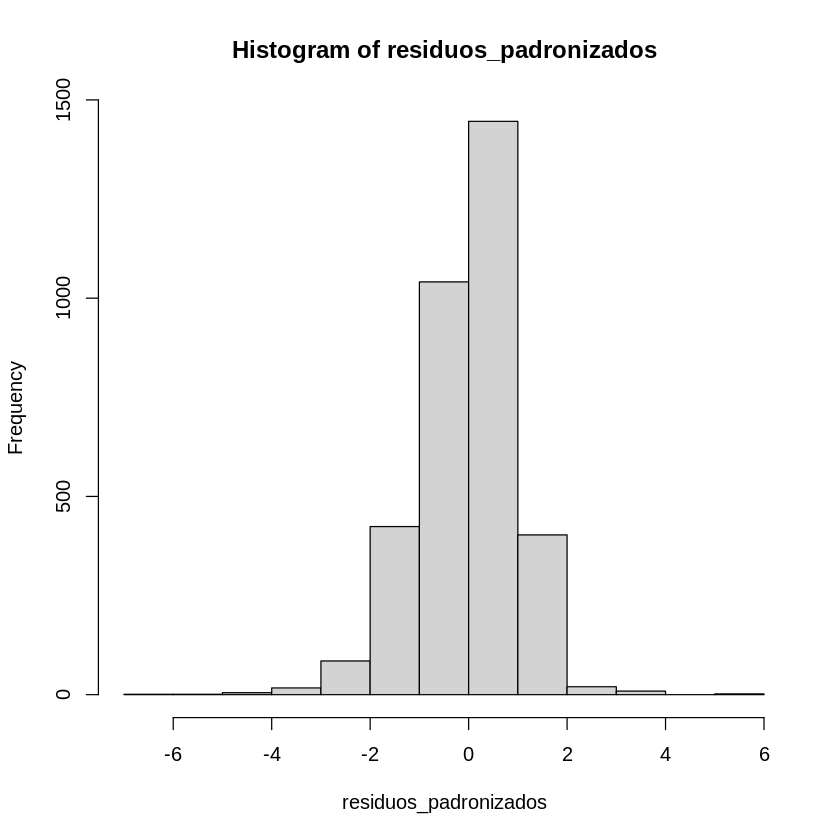

In [56]:
# Calcular os resíduos padronizados
residuos_padronizados <- rstandard(modelo)

# Exibir os resíduos padronizados
hist(residuos_padronizados)

In [37]:
# Calcular os resíduos ordinários
residuos_ordinarios <- residuals(modelo)

# Calcular a matriz de chapéu (hat matrix)
hat_values <- hatvalues(modelo)

# Calcular os resíduos PRESS
residuos_press <- residuos_ordinarios / (1 - hat_values)

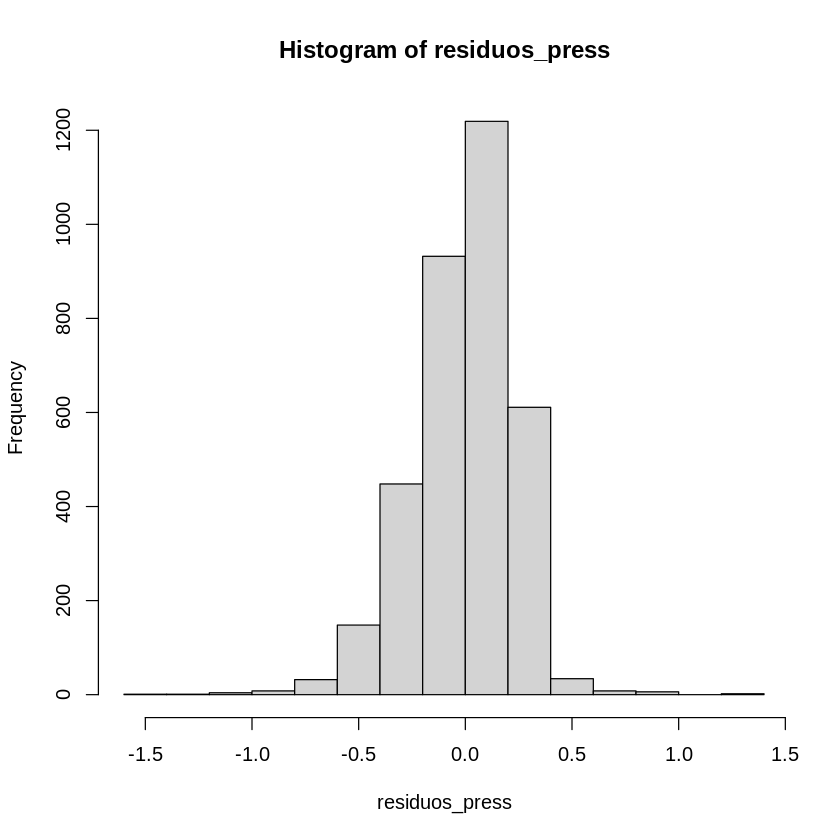

In [39]:
hist(residuos_press)

**Resíduos Studentizados**

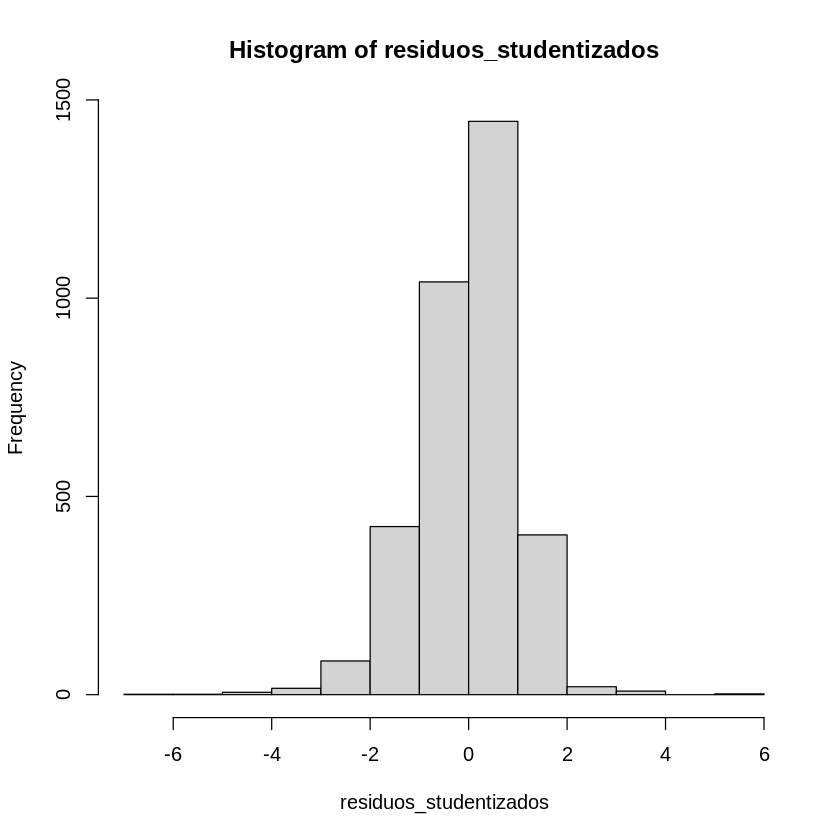

In [57]:
# Calcular os resíduos studentizados internamente
residuos_studentizados <- rstudent(modelo)

hist(residuos_studentizados)

## Análise de Resíduos Correlacionados:

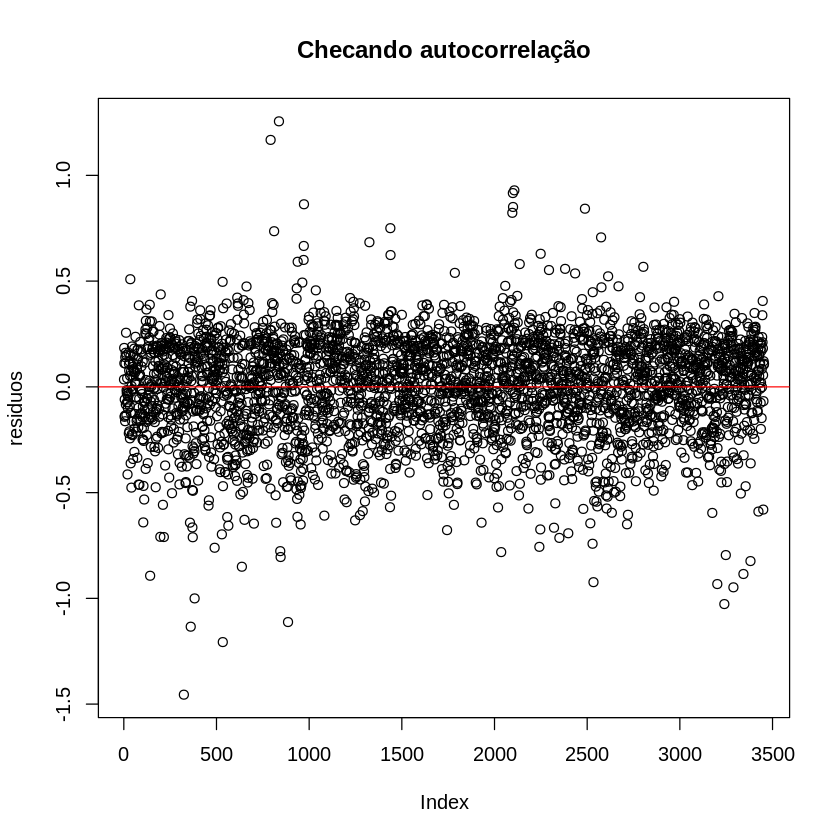

In [31]:
residuos <- modelo$res
plot(residuos, main='Checando autocorrelação')
abline(h = 0, col = "red")

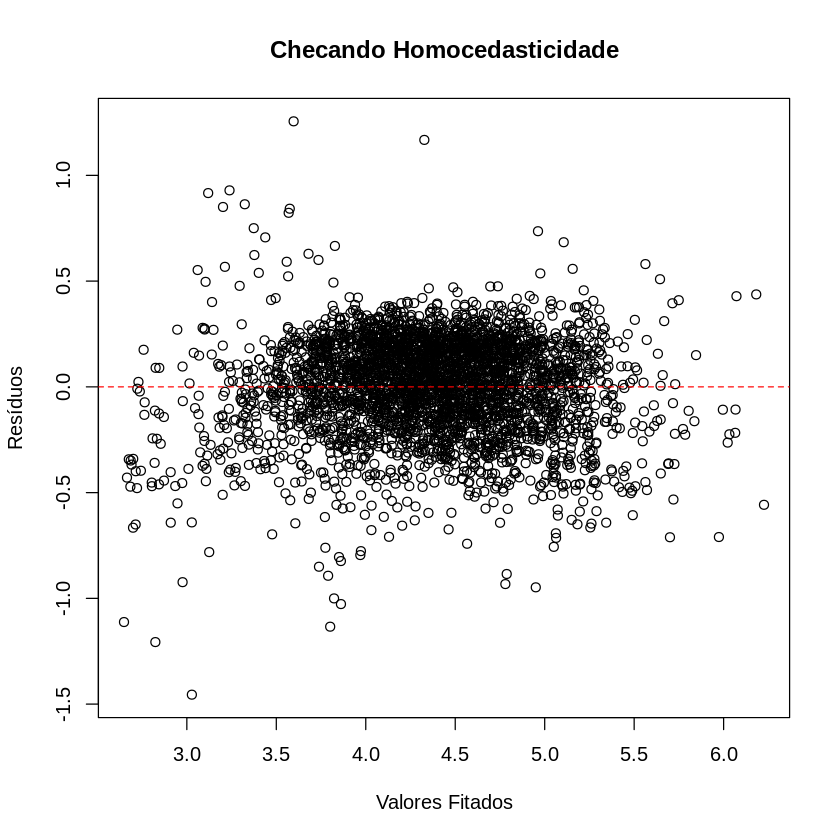

In [33]:
plot(y = modelo$res, x=modelo$fitted.values, main='Checando Homocedasticidade',xlab='Valores Fitados',ylab='Resíduos')
abline(h = 0, col = "red", lty = 2)

In [35]:
# Pontos de Alavanaca:
h_mean = (dim(df)[2])/dim(df)[1];h_mean

[1] 0.003763752